In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

from htc_projects.sepsis_icu.settings_sepsis_icu import settings_sepsis_icu
from htc_projects.sepsis_icu.utils import save_figure
from htc_projects.sepsis_icu.visualization_helpers import generate_df_score_comparison

In [2]:
plt.rcParams["font.family"] = settings_sepsis_icu.font_family
plt.rcParams["font.sans-serif"] = settings_sepsis_icu.font
plt.rcParams["font.size"] = settings_sepsis_icu.font_size
plt.rcParams["xtick.labelsize"] = settings_sepsis_icu.font_size
plt.rcParams["ytick.labelsize"] = settings_sepsis_icu.font_size

In [3]:
def generate_boxplot(target: str = "sepsis", metric: str = "AUROC", include_baseline: bool = True):
    targets = ["sepsis", "survival"]
    fig, ax = plt.subplots(1, 2, figsize=(settings_sepsis_icu.page_width_inch, 3), sharey=True, constrained_layout=True)

    df, df_agg = generate_df_score_comparison(target)
    display(df_agg)

    df_bedside = df.query("metadata == 'bedside'")
    subplot_titles = ["available within 1 hour", "available within 10 hours"]
    for j, metadata in enumerate(["1hr", "10hrs"]):
        df_metadata = df.query("metadata == @metadata and model != 'clinical data'")
        df_metadata = pd.concat([df_bedside, df_metadata])
        sns.boxplot(
            df_metadata,
            x="model",
            y=metric,
            hue="model",
            palette=settings_sepsis_icu.model_colors,
            showmeans=True,
            meanline=True,
            meanprops=dict(linestyle="dotted", linewidth=0.7, color="black"),
            showfliers=False,
            ax=ax[j],
        )
        for patch in ax[j].patches:
            fc = patch.get_facecolor()
            patch.set_facecolor(mpl.colors.to_rgba(fc, 0.7))

        ax[j].grid(True, linestyle="dotted")
        ax[j].set_ylabel(metric, fontsize=settings_sepsis_icu.font_size)
        ax[j].set_xlabel("model", fontsize=settings_sepsis_icu.font_size)
        ax[j].set_title(subplot_titles[j])
        current_xticklabels = [label.get_text() for label in ax[j].get_xticklabels()]
        new_xticklabels = [l.replace("_", " ") for l in current_xticklabels]
        new_xticklabels = [l.replace("HSI", "HSI palm") for l in current_xticklabels]
        new_xticklabels = [
            "HSI palm +\n clinical data" if l == "HSI palm + clinical data" else l for l in new_xticklabels
        ]
        if target == "sepsis":
            new_xticklabels = ["HSI\npalm" if l == "HSI palm" else l for l in new_xticklabels]
        ax[j].set_xticklabels(new_xticklabels)
        ax[j].tick_params(axis="x", which="major", pad=40)

    savepath = settings_sepsis_icu.results_dir / "paper_figures" / f"HSI_vs_Scores_{target}_{metric}.pdf"
    savepath.parent.mkdir(parents=True, exist_ok=True)
    save_figure(savepath, fig, dpi=300)

[WARNING][py.warnings] /home/silvia/htc/src/htc_projects/sepsis_icu/visualization_helpers.py:155:        warnings.py:110
FutureWarning: The provided callable <function median at 0x73e4cc20e520> is currently using                             
SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To                    
keep current behavior pass the string "median" instead.                                                                 
  df_agg = df_exploded.groupby(["model", "metadata", "site"], as_index=False).agg(                                      
                                                                                                                        

[WARNING][py.warnings] /home/silvia/htc/src/htc_projects/sepsis_icu/visualization_helpers.py:155:        warnings.py:110
FutureWarning: The provided callable <function std at 0x73e4cc2cd6c0> is currently using                                
SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep                  
current behavior pass the string "std" instead.                                                                         
  df_agg = df_exploded.groupby(["model", "metadata", "site"], as_index=False).agg(                                      
                                                                                                                        

[WARNING][py.warnings] /home/silvia/htc/src/htc_projects/sepsis_icu/visualization_helpers.py:317:        warnings.py:110
FutureWarning: The provided callable <function median at 0x73e4cc20e520> is currently using                             
SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To                    
keep current behavior pass the string "median" instead.                                                                 
  df_agg = df.groupby(["model", "metadata"], as_index=False).agg(                                                       
                                                                                                                        

[WARNING][py.warnings] /home/silvia/htc/src/htc_projects/sepsis_icu/visualization_helpers.py:317:        warnings.py:110
FutureWarning: The provided callable <function std at 0x73e4cc2cd6c0> is currently using                                
SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep                  
current behavior pass the string "std" instead.                                                                         
  df_agg = df.groupby(["model", "metadata"], as_index=False).agg(                                                       
                                                                                                                        

,model,metadata,median_AUROC,std_AUROC,percentile_025_AUROC,percentile_975_AUROC,median_AUPRC,std_AUPRC,percentile_025_AUPRC,percentile_975_AUPRC,median_brier_binary,std_brier_binary,percentile_025_brier_binary,percentile_975_brier_binary
0,CRP,10hrs,0.773939,0.024024,0.728665,0.823164,0.57188,0.045277,0.483333,0.661150,0.18429,0.007334,0.170181,0.198752
1,CRT,1hr,0.610606,0.030834,0.551266,0.670839,0.36953,0.034277,0.308191,0.441949,0.234221,0.003417,0.227424,0.240931
2,HSI,bedside,0.802,0.021818,0.758951,0.842993,0.583152,0.045941,0.500032,0.675963,0.196912,0.005132,0.186978,0.206588
3,HSI + clinical data,10hrs,0.942261,0.010741,0.920604,0.961723,0.860335,0.028389,0.797811,0.909049,0.151233,0.004053,0.142947,0.159393
4,HSI + clinical data,1hr,0.888394,0.016475,0.855538,0.919234,0.75042,0.040376,0.672495,0.826588,0.1709,0.004518,0.161861,0.180134
5,NEWS,1hr,0.810029,0.021084,0.764298,0.849786,0.593578,0.045225,0.505838,0.683377,0.189902,0.005228,0.179746,0.200310
6,PCT,10hrs,0.734592,0.026857,0.680149,0.784918,0.613497,0.042296,0.520089,0.688784,0.190414,0.005550,0.179868,0.201009
7,SIRS,10hrs,0.647751,0.028890,0.590372,0.702396,0.431165,0.038964,0.357084,0.515643,0.223456,0.003828,0.216028,0.231201
8,SMS,1hr,0.597801,0.031237,0.535766,0.664627,0.423792,0.041750,0.342502,0.504367,0.235772,0.002627,0.230584,0.241007
9,SOFA,10hrs,0.809328,0.021279,0.763670,0.847020,0.57716,0.044191,0.494487,0.666312,0.187319,0.005414,0.177573,0.198417


[WARNING][py.warnings] /tmp/ipykernel_1009546/2458159278.py:39: UserWarning: set_ticklabels() should     warnings.py:110
only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.                              
  ax.set_xticklabels(new_xticklabels)                                                                                   
                                                                                                                        

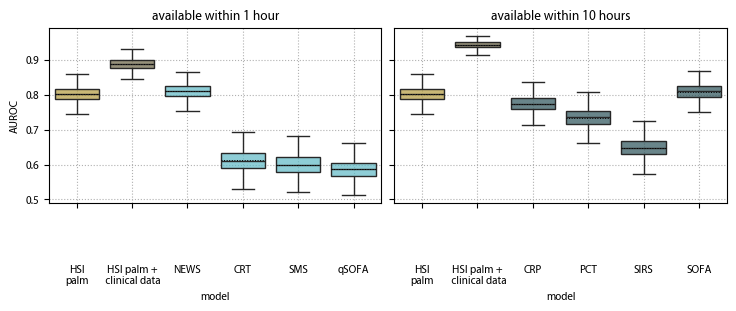

In [4]:
generate_boxplot()

,model,metadata,median_AUROC,std_AUROC,percentile_025_AUROC,percentile_975_AUROC,median_AUPRC,std_AUPRC,percentile_025_AUPRC,percentile_975_AUPRC,median_brier_binary,std_brier_binary,percentile_025_brier_binary,percentile_975_brier_binary
0,APACHE_II,10hrs,0.673281,0.032938,0.610648,0.738808,0.238894,0.038607,0.167437,0.316701,0.189955,0.005152,0.179885,0.199870
1,HSI,bedside,0.72148,0.036451,0.651738,0.789108,0.338303,0.055016,0.242460,0.459289,0.201586,0.004178,0.193222,0.210024
2,HSI + clinical data,10hrs,0.828712,0.027314,0.774241,0.876381,0.520924,0.060321,0.401563,0.627921,0.179907,0.003951,0.172465,0.187760
3,HSI + clinical data,1hr,0.829762,0.028293,0.770159,0.880237,0.489052,0.061273,0.364182,0.607497,0.18327,0.003902,0.176100,0.191259
4,SOFA,10hrs,0.714728,0.034138,0.644880,0.776543,0.26789,0.041465,0.194213,0.357548,0.196466,0.005168,0.186350,0.206918
5,VIS,1hr,0.596883,0.041181,0.513930,0.676601,0.245341,0.044262,0.173309,0.345474,0.180661,0.005268,0.170929,0.191205
6,clinical data,10hrs,0.819101,0.027832,0.760083,0.868591,0.441644,0.061120,0.322647,0.562841,0.141309,0.004777,0.132188,0.151329
7,clinical data,1hr,0.804395,0.030729,0.737817,0.859052,0.431322,0.061494,0.314591,0.557991,0.141178,0.004829,0.131567,0.151133


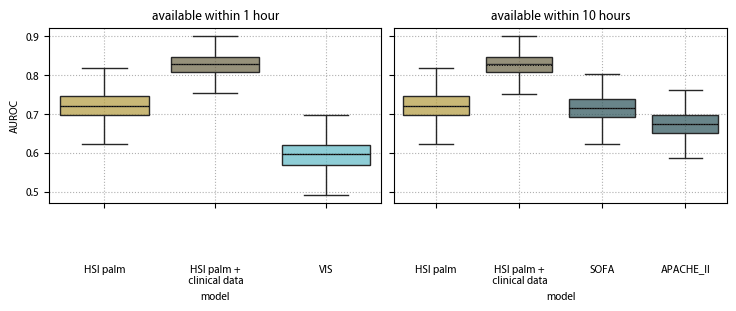

In [5]:
generate_boxplot(target="survival")